In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Case Study: Bank Telemarketing Campaign

#The bank aims to enhance its revenue by conducting a cost-efficient telemarketing campaign for term deposits among existing customers. 
Term deposits, fixed investments with predetermined interest rates, serve to foster long-term customer relationships. 
The objective is to conduct an end-to-end Exploratory Data Analysis (EDA)on the campaign dataset, identifying patterns and providing 
insights to improve the positive response rate. The analysis will involve examining customer demographics,temporal trends, and other factors 
influencing the success of the campaign, ultimately offering recommendations for targeted improvements in the bank's marketing strategy.


#Task to Perform:

#Conduct a thorough Exploratory Data Analysis (EDA) on the dataset related to the bank's telemarketing campaign that should involve the following sequential steps:

# 1. Understanding the Dataset

# a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [4]:
df = pd.read_csv(r"C:\Users\admin\Downloads\bank_marketing_updated_v1.csv")
df.head(5)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,45211.0,22606.000000,13051.435847,1.0,11303.5,22606.0,33908.5,45211.0
age,45191.0,40.935651,10.619198,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [11]:
df.describe(include=['object'])

,marital,jobedu,targeted,default,housing,loan,contact,month,duration,poutcome,response
count,45211,45211,45211,45211,45211,45211,45211,45161,45211,45211,45181
unique,3,48,2,2,2,2,3,12,2646,4,2
top,married,"management,tertiary",yes,no,yes,no,cellular,"may, 2017",1.5 min,unknown,no
freq,27214,7801,37091,44396,25130,37967,29285,13747,138,36959,39894


# b. Inspect for any instances of missing values, outliers, or data inconsistencies.

In [13]:
# Missing Values

missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
age         20
month       50
response    30
dtype: int64


In [3]:
# Function to detect outliers using IQR

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [4]:
# Detect and display outliers for numerical columns

numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nNumber of outliers in column '{col}': {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.head())


Number of outliers in column 'customerid': 0

Number of outliers in column 'age': 487
       customerid   age  salary  balance   marital            jobedu targeted  \
29158       29159  83.0   55000      425   married   retired,primary      yes   
29261       29262  75.0   55000       46  divorced   retired,primary      yes   
29263       29264  75.0   55000     3324   married   retired,primary      yes   
29322       29323  83.0   55000     6236   married  retired,tertiary      yes   
29865       29866  75.0   55000     3881  divorced   retired,primary      yes   

      default housing loan    contact  day      month              duration  \
29158      no      no   no  telephone    2  feb, 2017              15.2 min   
29261      no      no   no   cellular    2  feb, 2017               4.9 min   
29263      no      no   no   cellular    2  feb, 2017  2.48333333333333 min   
29322      no      no   no   cellular    2  feb, 2017  4.71666666666667 min   
29865      no     yes   no   ce

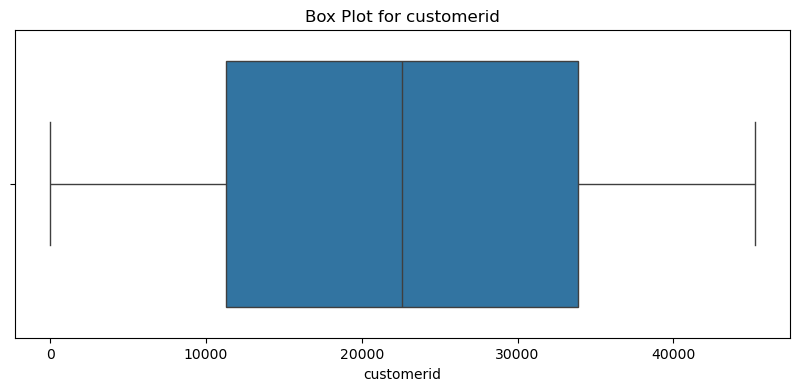

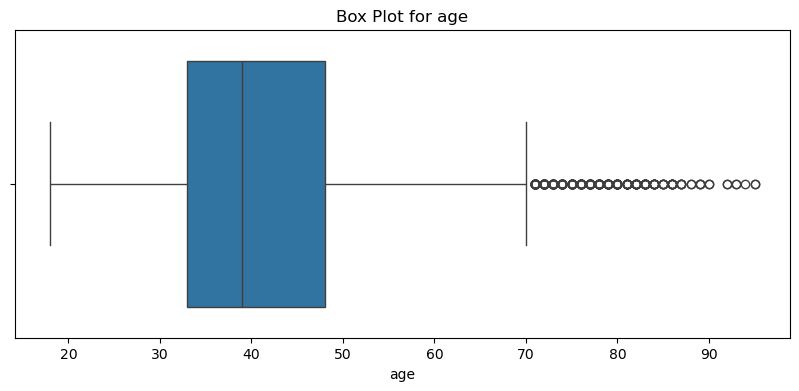

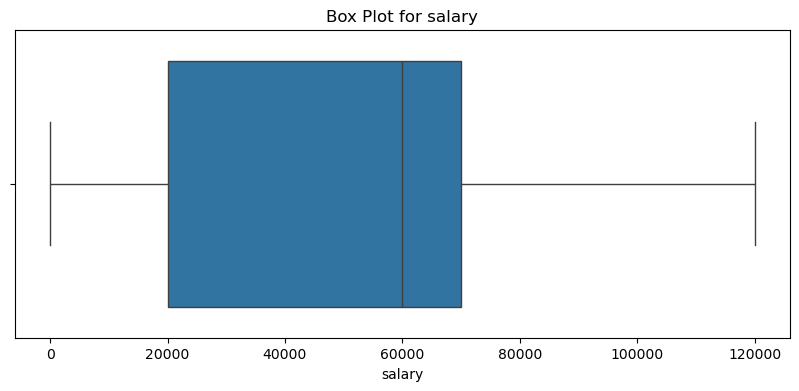

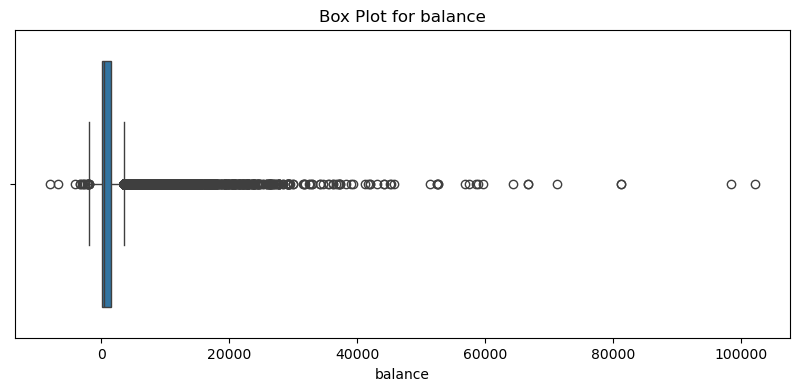

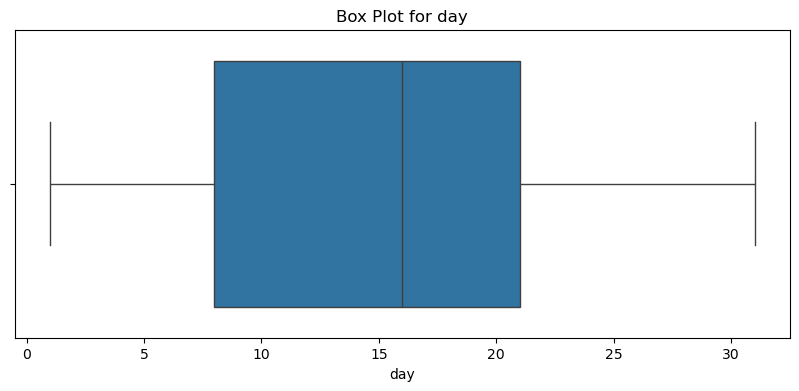

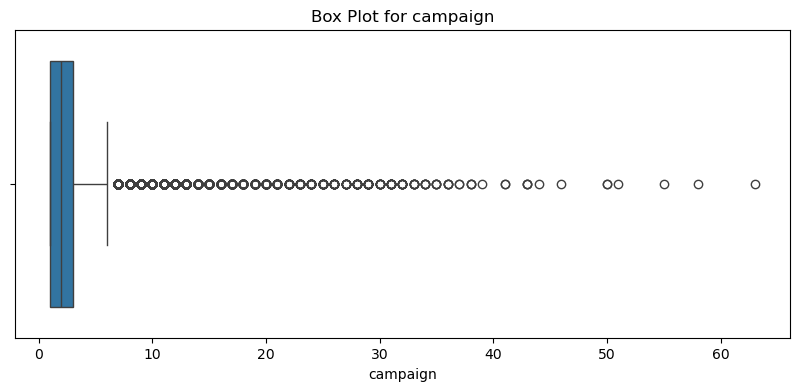

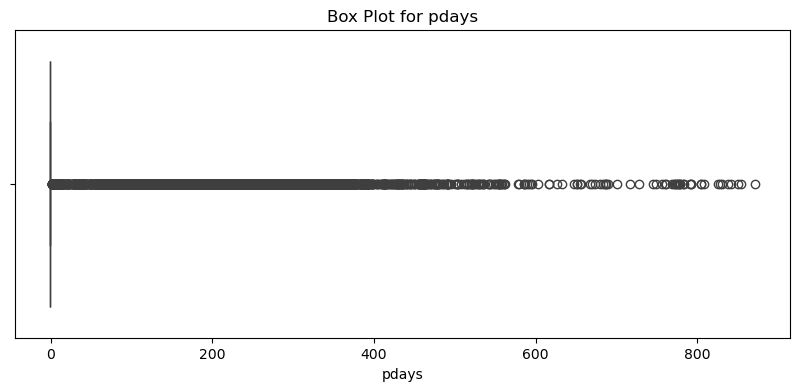

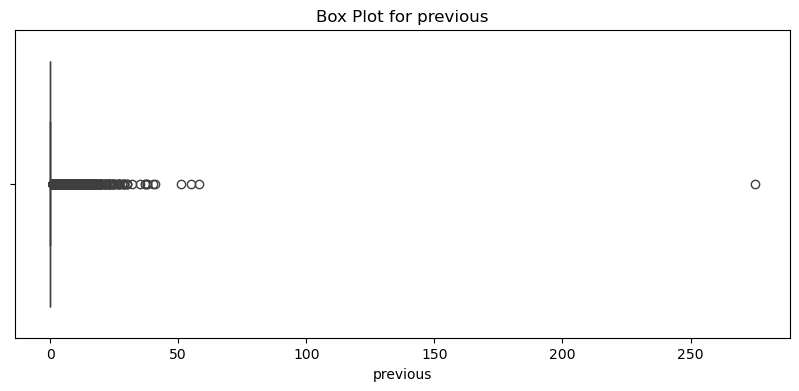

In [19]:
# Visualize outliers with box plots

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [5]:
print("\nUnique values in 'response' column:")
print(df['response'].unique())

print("\nUnique values in 'month' column:")
print(df['month'].unique())

print("\nUnique values in 'marital' column:")
print(df['marital'].unique())


Unique values in 'response' column:
['no' 'yes' nan]

Unique values in 'month' column:
['may, 2017' nan 'jun, 2017' 'jul, 2017' 'aug, 2017' 'oct, 2017'
 'nov, 2017' 'dec, 2017' 'jan, 2017' 'feb, 2017' 'mar, 2017' 'apr, 2017'
 'sep, 2017']

Unique values in 'marital' column:
['married' 'single' 'divorced']


In [29]:
# Handling missing values in 'age'

median_age = df['age'].median()
print(median_age)

39.0


In [30]:
data_median_imputed = df.copy()
data_median_imputed['age'].fillna(data_median_imputed['age'].median(), inplace=True)
print("\nAfter Median Imputation (age):")
print(data_median_imputed)


After Median Imputation (age):
       customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing 

C:\Users\admin\AppData\Local\Temp\ipykernel_2344\2632123121.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_median_imputed['age'].fillna(data_median_imputed['age'].median(), inplace=True)


In [31]:
data_median_imputed.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [6]:
mode_month = df['month'].mode()
print(mode_month)

0    may, 2017
Name: month, dtype: object


In [34]:
mode_response = df['response'].mode()
print(mode_response)

0    no
Name: response, dtype: object


In [8]:
# Mode Imputation for Month & Response

data_mode_imputed = df.copy()
data_mode_imputed['month'].fillna(data_mode_imputed['month'].mode()[0], inplace=True)
data_mode_imputed['response'].fillna(data_mode_imputed['response'].mode()[0], inplace=True)

print("\nAfter Mode Imputation Month & Response:")
print(data_mode_imputed)


After Mode Imputation Month & Response:
       customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default

C:\Users\admin\AppData\Local\Temp\ipykernel_9728\1351925357.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_mode_imputed['month'].fillna(data_mode_imputed['month'].mode()[0], inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_9728\1351925357.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [37]:
data_mode_imputed.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
dtype: int64

# 2. Descriptive Statistics

# a. Derive summary statistics (mean, median, standard deviation) for relevant columns.

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,45211.0,22606.000000,13051.435847,1.0,11303.5,22606.0,33908.5,45211.0
age,45211.0,40.934795,10.616926,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.

Unique values in 'response' column:
['no' 'yes' nan]

Distribution of 'response' column:
response
no     39894
yes     5287
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_2344\379249757.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_counts.index, y=response_counts.values, palette='viridis')


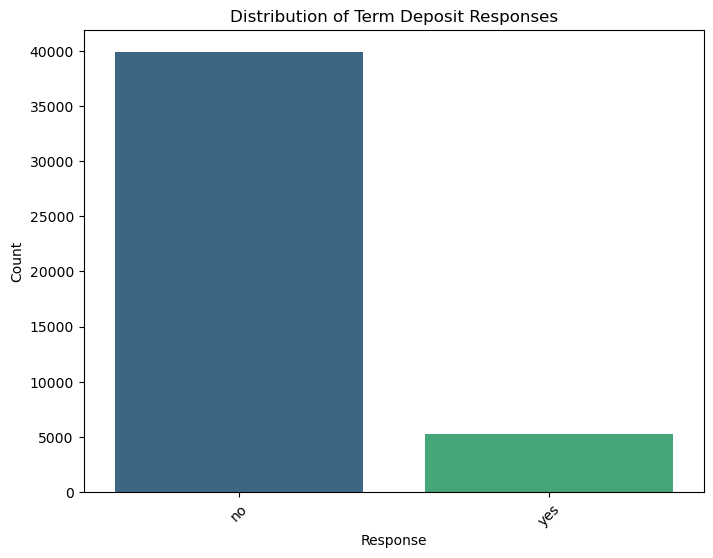

In [39]:
# Check for the target variable 'response'
print("Unique values in 'response' column:")
print(df['response'].unique())

# Count the occurrences of each category in the 'response' column
response_counts = df['response'].value_counts()
print("\nDistribution of 'response' column:")
print(response_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=response_counts.index, y=response_counts.values, palette='viridis')
plt.title('Distribution of Term Deposit Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 3. Univariate Analysis

# a. Examine the distribution of individual key features, such as age, balance, and call duration.

Descriptive statistics for 'Age':
count    45211.000000
mean        40.934795
std         10.616926
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


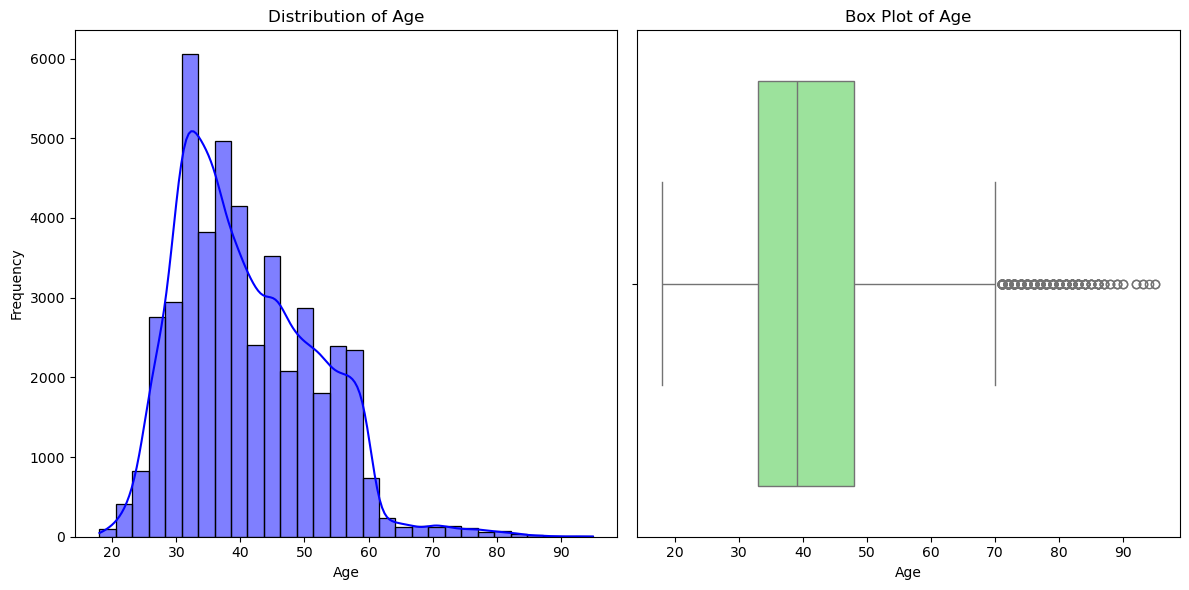

In [43]:
# Descriptive statistics and visualizations for 'age','balance' & call duration

print("Descriptive statistics for 'Age':")
print(df['age'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'], color='lightgreen')
plt.title('Box Plot of Age')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

Descriptive statistics for 'balance':
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


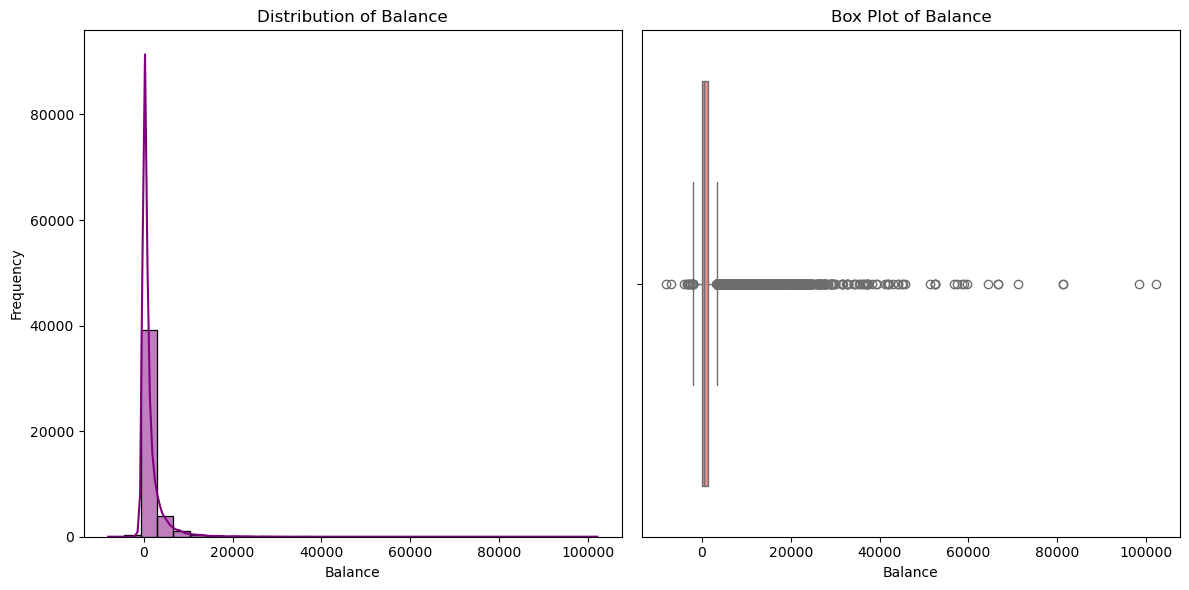

In [44]:
# Descriptive statistics and visualizations for 'balance'

print("Descriptive statistics for 'balance':")
print(df['balance'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['balance'], bins=30, kde=True, color='purple')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['balance'], color='lightcoral')
plt.title('Box Plot of Balance')
plt.xlabel('Balance')

plt.tight_layout()
plt.show()

Descriptive statistics for 'duration':
count       45211
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object


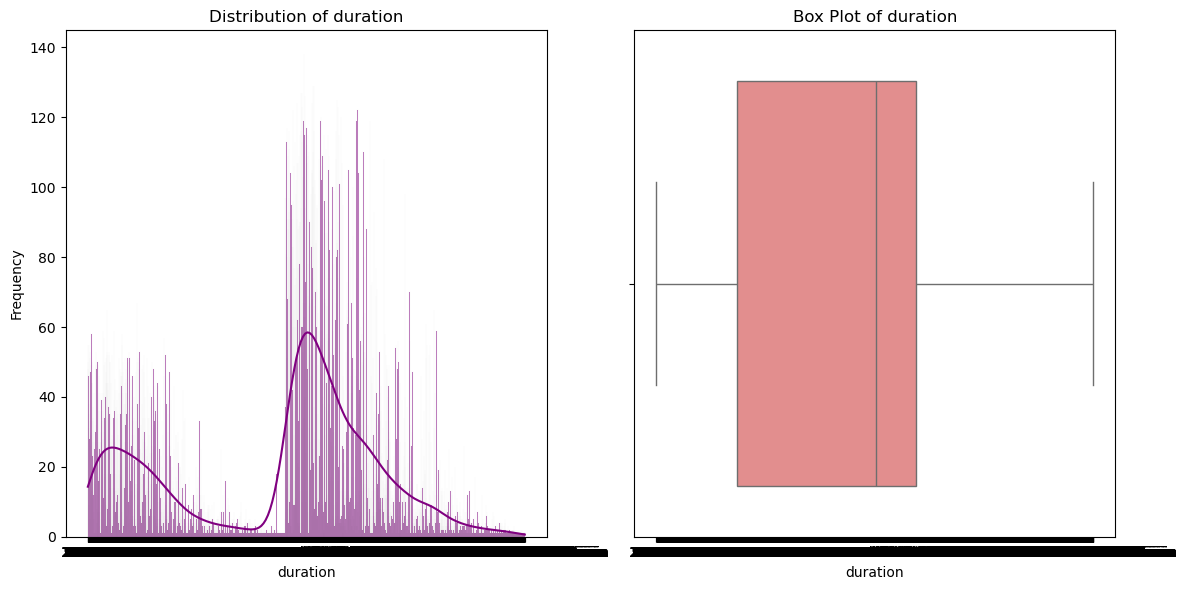

In [8]:
# Descriptive statistics and visualizations for 'duration'

print("Descriptive statistics for 'duration':")
print(df['duration'].describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of duration')
plt.xlabel('duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['duration'], color='lightcoral')
plt.title('Box Plot of duration')
plt.xlabel('duration')

plt.tight_layout()
plt.show()

# b. Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.

#Refer above codes for histogram and box plots.

Text(0, 0.5, 'Density')

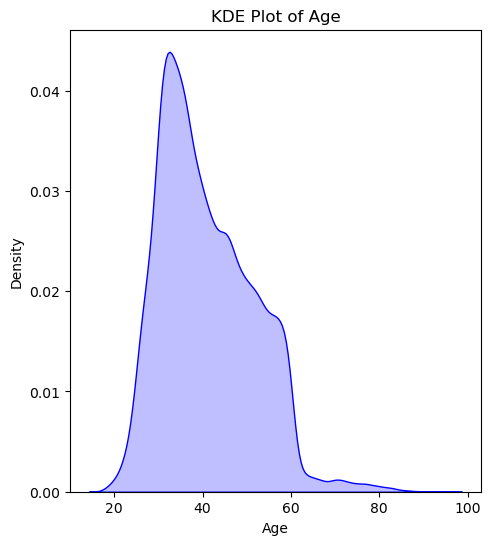

In [11]:
# KDE plot for 'age'

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(df['age'], fill=True, color='blue')
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

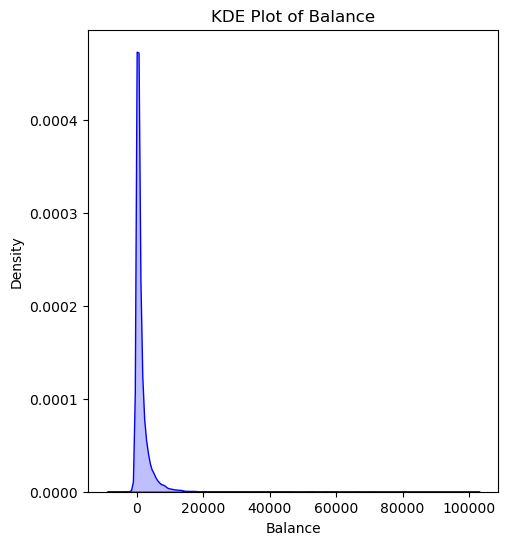

In [12]:
# KDE plot for 'balance'

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(df['balance'], fill=True, color='blue')
plt.title('KDE Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')

In [14]:
import re

In [15]:
# Define a function to standardize duration to minutes

def convert_to_minutes(duration):
    if pd.isna(duration):
        return duration
    duration_str = str(duration).strip()
    if 'sec' in duration_str:
        value = float(re.findall(r'[0-9.]+', duration_str)[0])
        return value / 60
    elif 'min' in duration_str or duration_str.isnumeric():
        return float(re.findall(r'[0-9.]+', duration_str)[0])
    else:
        return None

# Apply the function to the 'duration' column
df['duration_minutes'] = df['duration'].apply(convert_to_minutes)

# Check the result
print(df[['duration', 'duration_minutes']].head())

  duration  duration_minutes
0  261 sec          4.350000
1  151 sec          2.516667
2   76 sec          1.266667
3   92 sec          1.533333
4  198 sec          3.300000


In [17]:
df['duration_minutes'].isnull().sum()

0

Text(0, 0.5, 'Density')

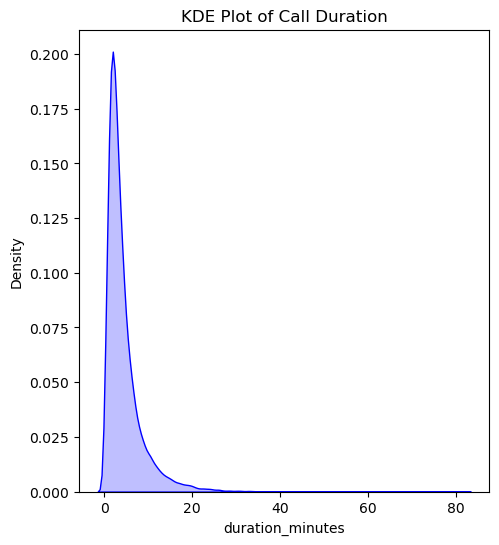

In [18]:
# KDE plot for 'Call Duration'

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(df['duration_minutes'], fill=True, color='blue')
plt.title('KDE Plot of Call Duration')
plt.xlabel('duration_minutes')
plt.ylabel('Density')

# 4. Bivariate Analysis

# a. Evaluate the relationship between independent variables and the target variable.

In [21]:
# Convert target variable to numeric (binary encoding)
df['response_binary'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Summary statistics
print(df[['age', 'balance', 'duration_minutes', 'response_binary']].groupby('response_binary').describe())

# Correlation with target variable
correlation = df[['age', 'balance', 'duration_minutes', 'response_binary']].corr()
print(correlation['response_binary'])

                     age                                                      \
                   count       mean        std   min   25%   50%   75%   max   
response_binary                                                                
0                39906.0  40.838771  10.173262  18.0  33.0  39.0  48.0  95.0   
1                 5285.0  41.667171  13.498364  18.0  31.0  38.0  50.0  95.0   

                 balance               ...                   duration_minutes  \
                   count         mean  ...     75%       max            count   
response_binary                        ...                                      
0                39924.0  1303.665339  ...  1345.0  102127.0          39924.0   
1                 5287.0  1804.832041  ...  2159.5   81204.0           5287.0   

                                                                              \
                     mean       std       min       25%       50%        75%   
response_binary                  

Text(0, 0.5, 'Age')

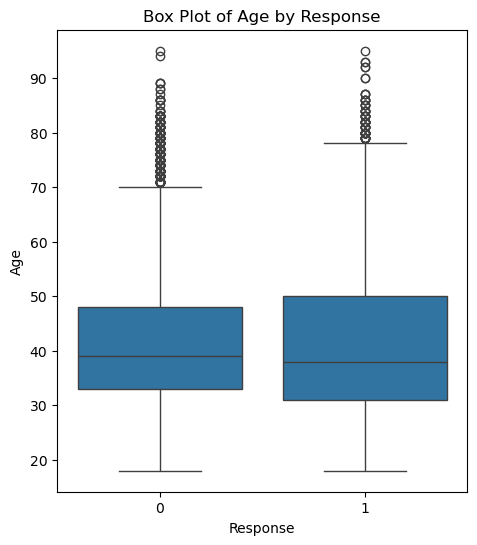

In [25]:
# Box plot for 'age'

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='response_binary', y='age', data=df)
plt.title('Box Plot of Age by Response')
plt.xlabel('Response')
plt.ylabel('Age')

Text(0, 0.5, 'balance')

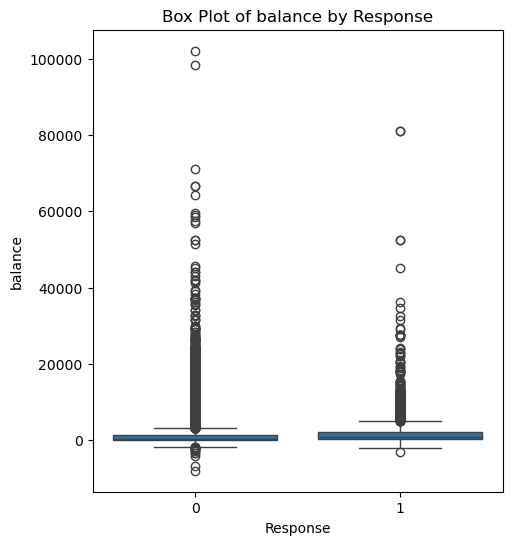

In [27]:
# Box plot for 'balance'

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='response_binary', y='balance', data=df)
plt.title('Box Plot of balance by Response')
plt.xlabel('Response')
plt.ylabel('balance')

Text(0, 0.5, 'duration_minutes')

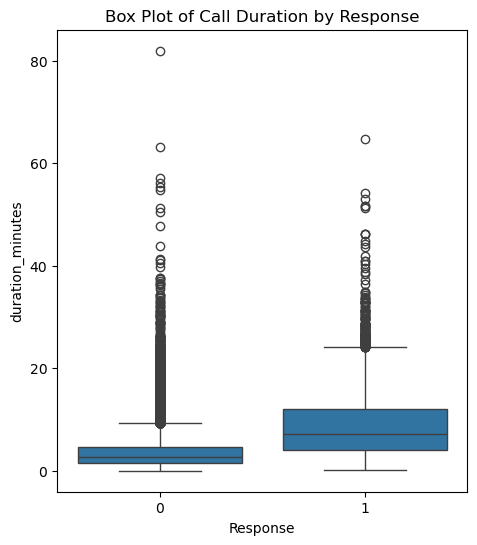

In [28]:
# Box plot for 'Call Duration'

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='response_binary', y='duration_minutes', data=df)
plt.title('Box Plot of Call Duration by Response')
plt.xlabel('Response')
plt.ylabel('duration_minutes')

# b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.

# Bar Charts

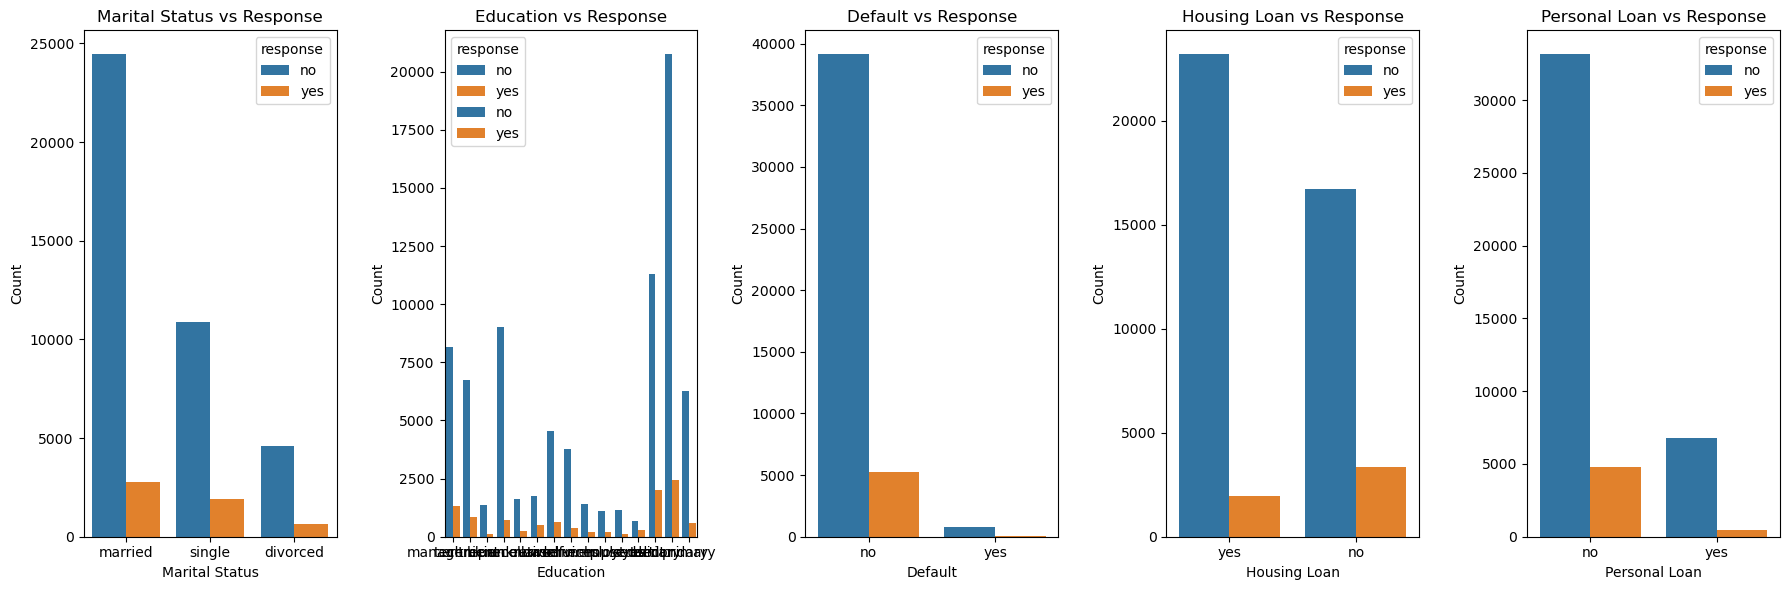

In [34]:
plt.figure(figsize=(18, 6))

# Bar plot for 'marital'
plt.subplot(1, 5, 1)
sns.countplot(x='marital', hue='response', data=df)
plt.title('Marital Status vs Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Bar plot for 'Education'
plt.subplot(1, 5, 2)
sns.countplot(x='education', hue='response', data=df)
plt.title('Education vs Response')
plt.xlabel('Education')
plt.ylabel('Count')

# Bar plot for 'default'
plt.subplot(1, 5, 3)
sns.countplot(x='default', hue='response', data=df)
plt.title('Default vs Response')
plt.xlabel('Default')
plt.ylabel('Count')

# Bar plot for 'housing'
plt.subplot(1, 5, 4)
sns.countplot(x='housing', hue='response', data=df)
plt.title('Housing Loan vs Response')
plt.xlabel('Housing Loan')
plt.ylabel('Count')

# Bar plot for 'loan'
plt.subplot(1, 5, 5)
sns.countplot(x='loan', hue='response', data=df)
plt.title('Personal Loan vs Response')
plt.xlabel('Personal Loan')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
# Define a function to split 'jobedu' into 'job' and 'education'

def split_jobedu(jobedu):
    if pd.isna(jobedu):
        return pd.Series([None, None])
    # Assuming the format is 'job,education'
    parts = jobedu.split(',')
    if len(parts) == 2:
        return pd.Series(parts)
    else:
        return pd.Series([None, None])

df[['job', 'education']] = df['jobedu'].apply(split_jobedu)
print(df[['job', 'education']].head())

            job  education
0    management   tertiary
1    technician  secondary
2  entrepreneur  secondary
3   blue-collar    unknown
4       unknown    unknown


Text(0, 0.5, 'Count')

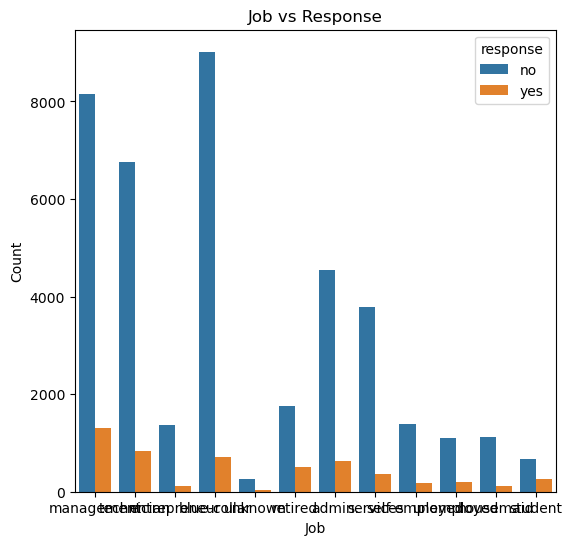

In [38]:
plt.figure(figsize=(36, 6))

# Bar plot for 'job'
plt.subplot(1, 5, 2)
sns.countplot(x='job', hue='response', data=df)
plt.title('Job vs Response')
plt.xlabel('Job')
plt.ylabel('Count')

# Stacked Bar Charts

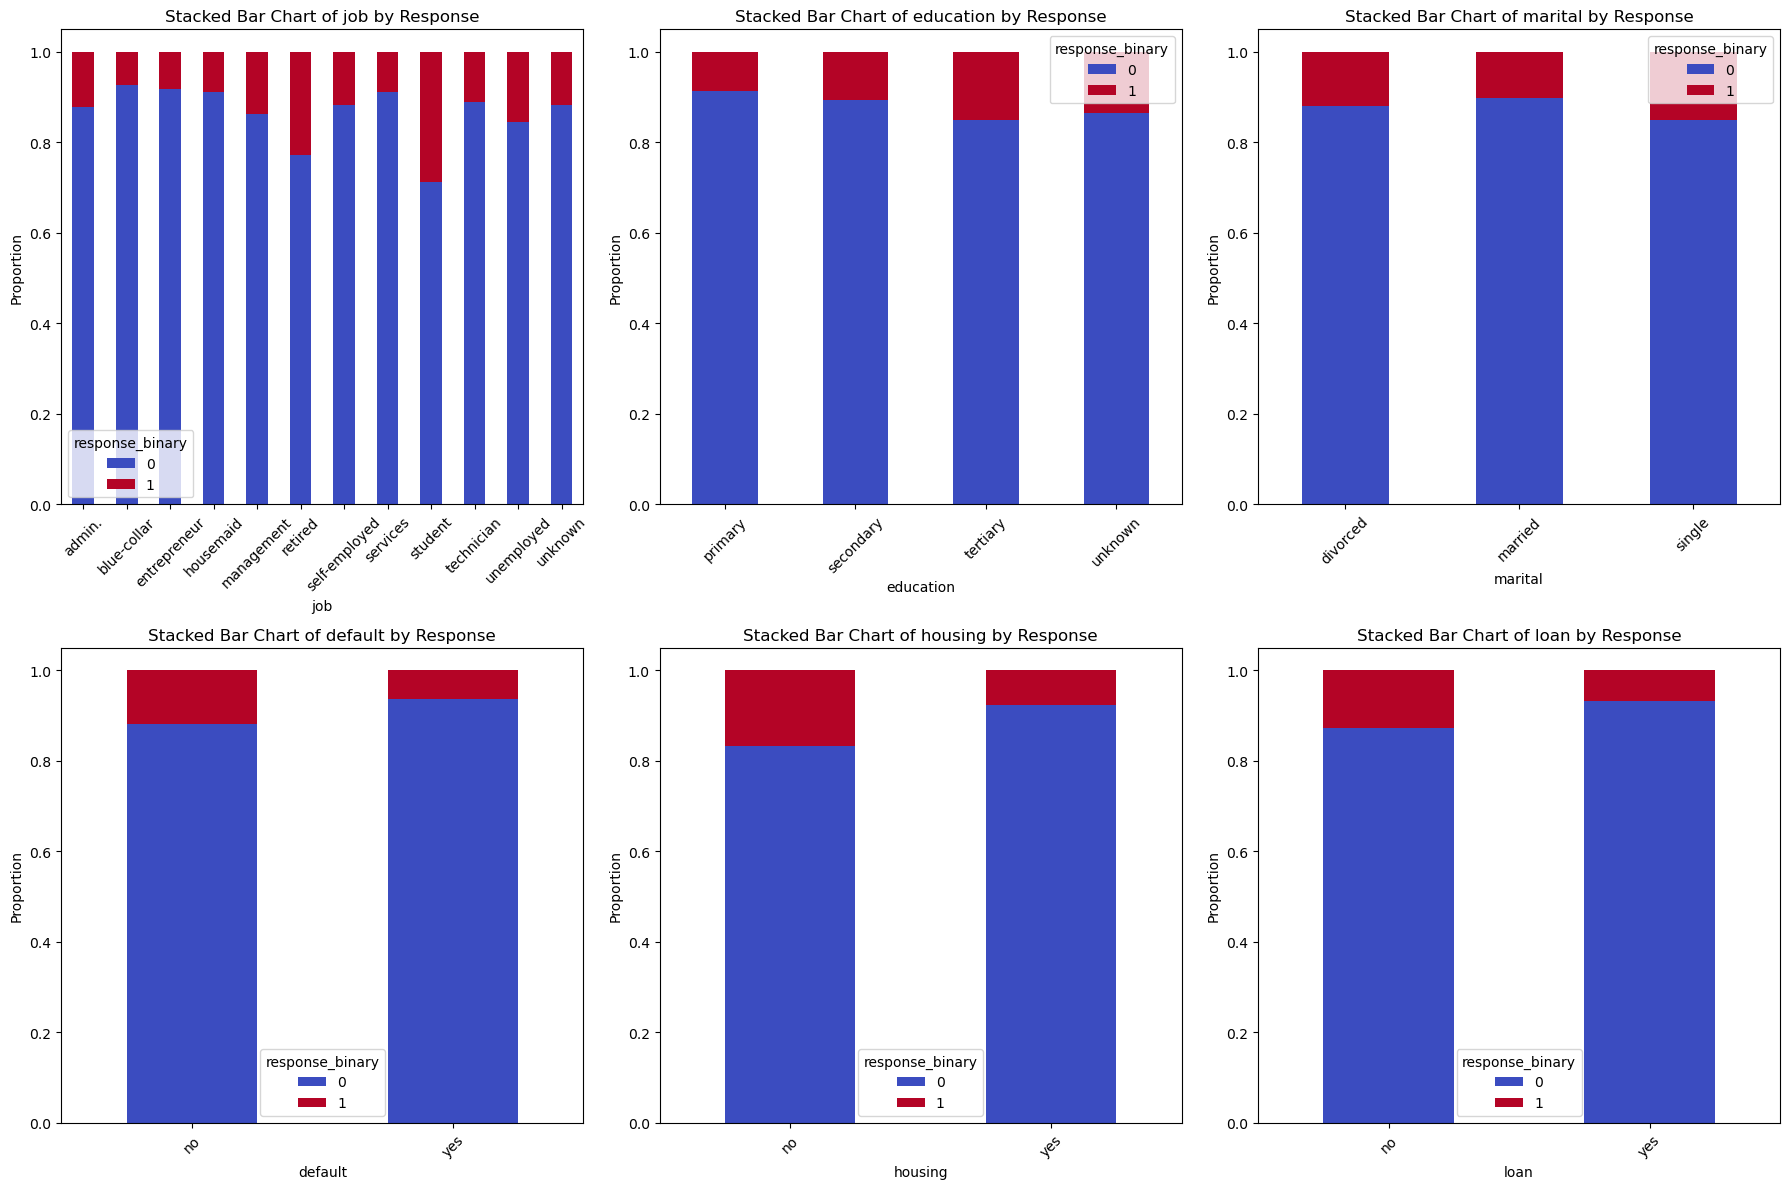

In [39]:
# Convert target variable to binary (0 and 1)
df['response_binary'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Define a list of categorical features to analyze
categorical_features = ['job', 'education', 'marital', 'default', 'housing', 'loan']

# Create stacked bar charts for each categorical feature
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['response_binary'])
    
    # Normalize to get proportions
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    # Plot stacked bar chart
    proportions.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm')
    plt.title(f'Stacked Bar Chart of {feature} by Response')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Heat Maps

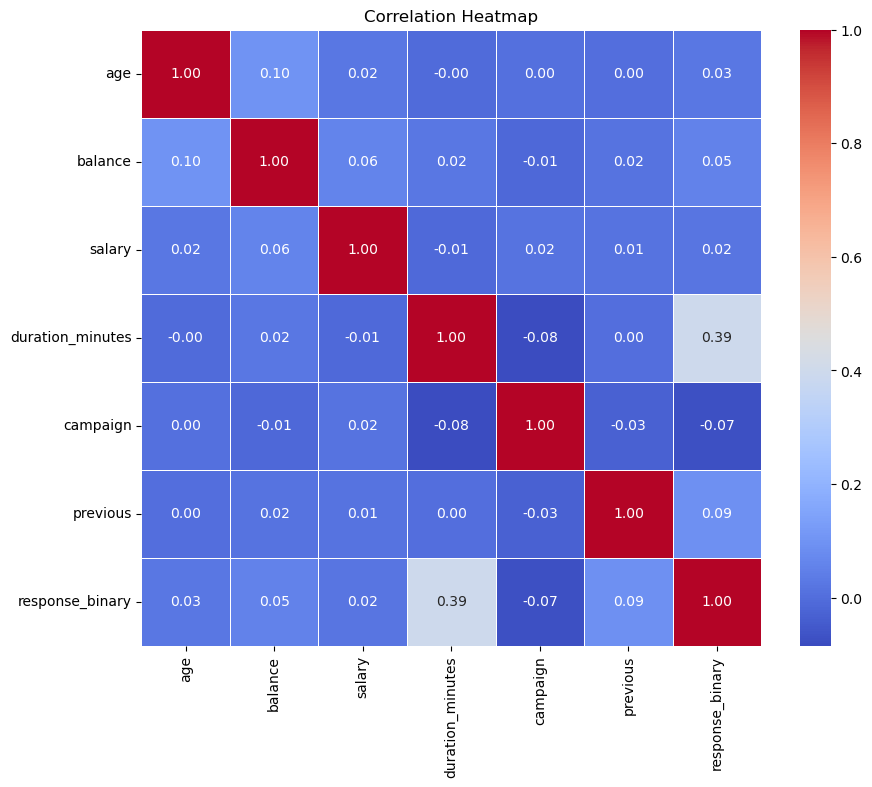

In [41]:
# Create a DataFrame with numeric features and the target variable
numeric_features = ['age', 'balance','salary', 'duration_minutes', 'campaign', 'previous']
df_numeric = df[numeric_features + ['response_binary']]

# Calculate correlations
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 5. Categorical Variables Analysis
# a. Investigate the distribution of categorical variables such as job type, education, and marital status.


Distribution of job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

Distribution of education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

Distribution of marital:
marital
married     27

C:\Users\admin\AppData\Local\Temp\ipykernel_8528\1741531798.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette='viridis')
C:\Users\admin\AppData\Local\Temp\ipykernel_8528\1741531798.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette='viridis')
C:\Users\admin\AppData\Local\Temp\ipykernel_8528\1741531798.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, order=df[feature].value_

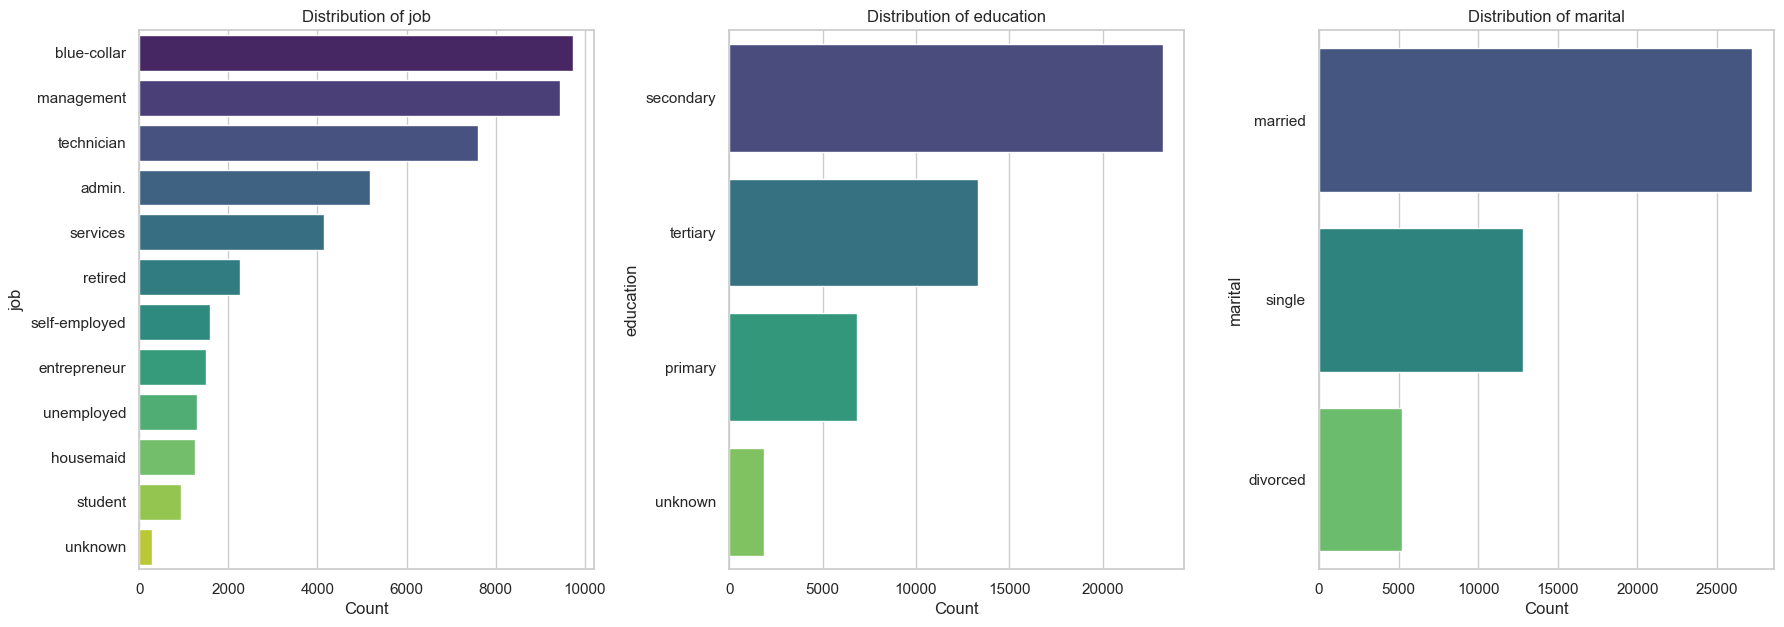

In [42]:
# Summary statistics for categorical variables
categorical_features = ['job', 'education', 'marital']

for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts())
    print(df[feature].value_counts(normalize=True) * 100)  # percentages

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot bar charts for each categorical feature
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

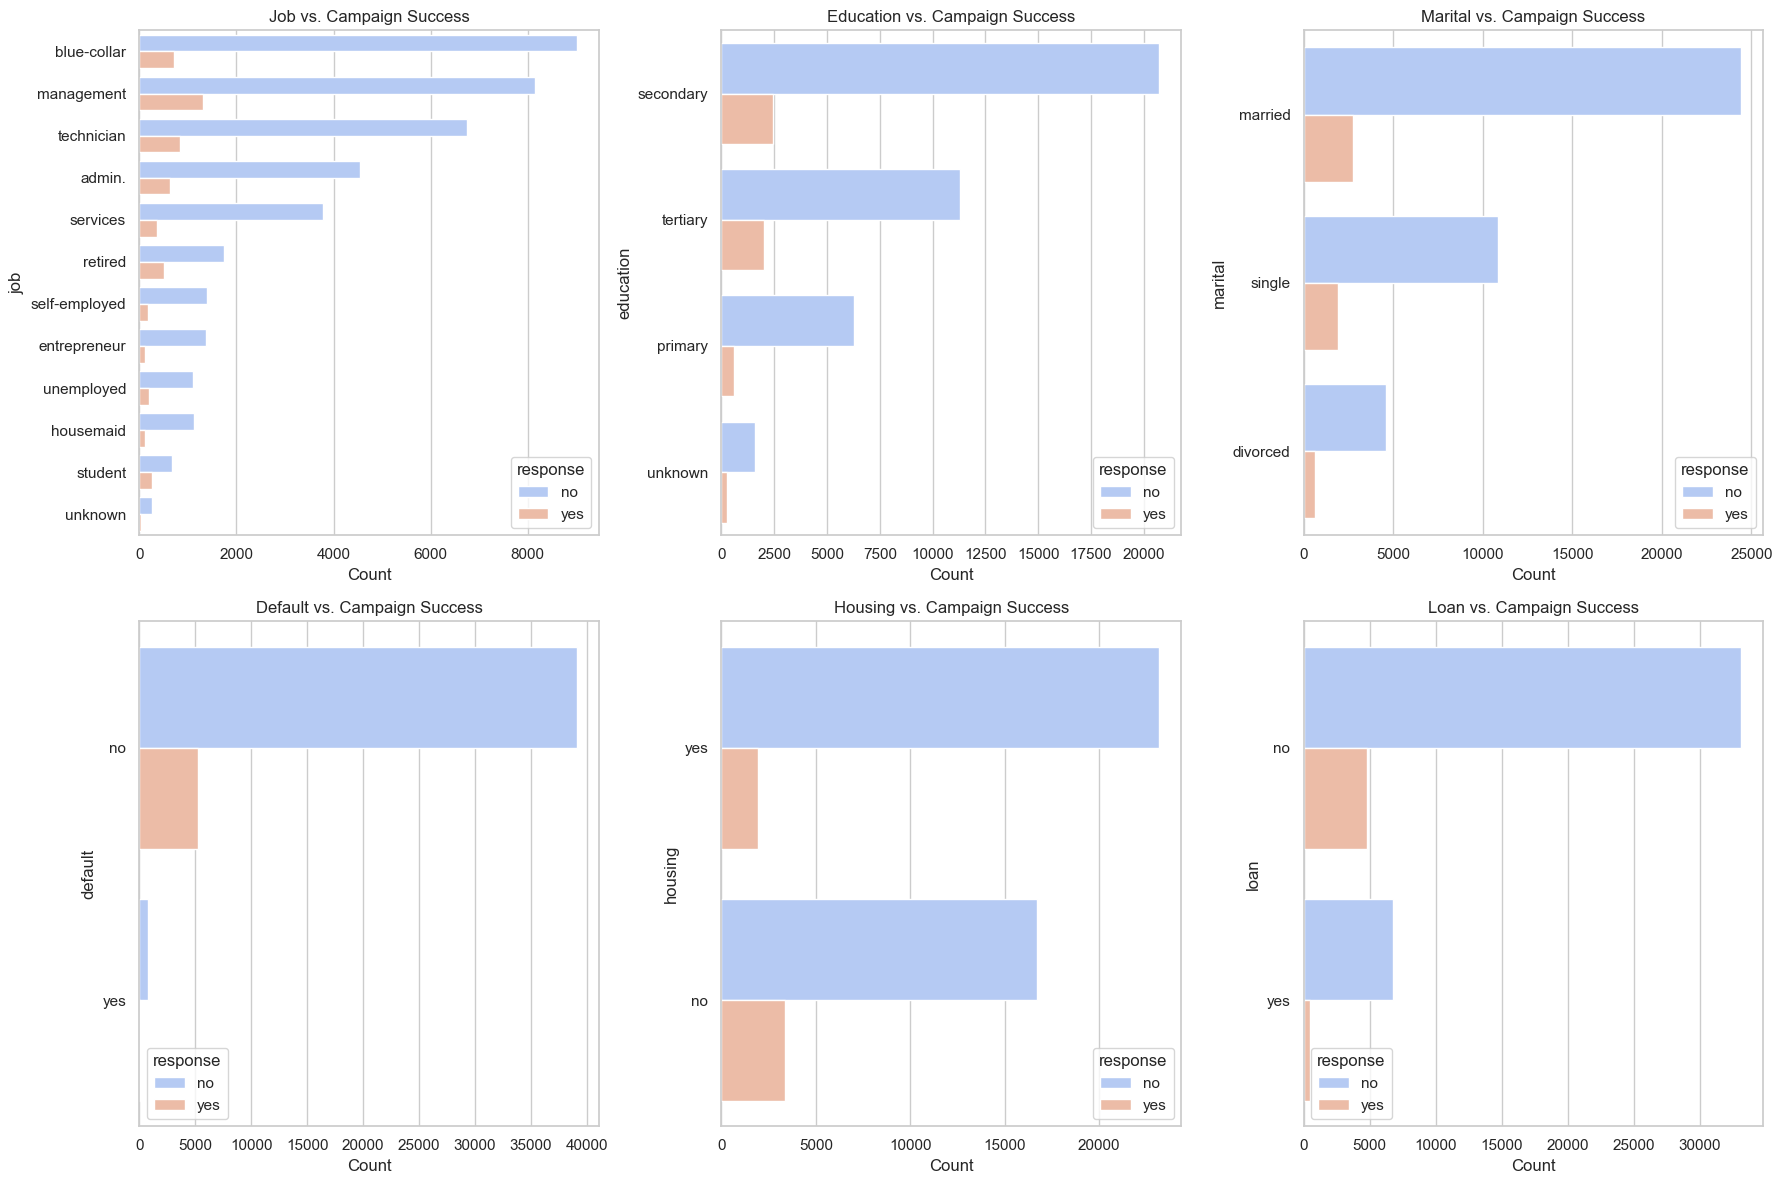

In [45]:
# Convert target variable to binary (0 and 1)
df['response_binary'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Define categorical features to analyze
categorical_features = ['job', 'education', 'marital', 'default', 'housing', 'loan']

# Create bar charts for each categorical feature
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    # Plot the count of successful and unsuccessful responses by category
    sns.countplot(y=feature, hue='response', data=df, palette='coolwarm', order=df[feature].value_counts().index)
    plt.title(f'{feature.capitalize()} vs. Campaign Success')
    plt.xlabel('Count')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# 6. Temporal Analysis
# a. Investigate temporal patterns in the success of the campaign over time.

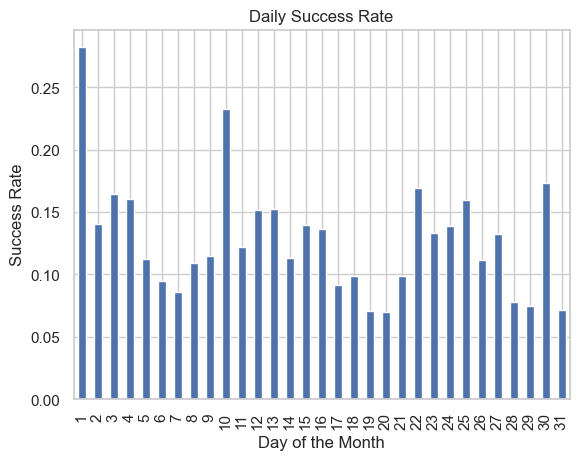

In [116]:
daily_success_rate = df.groupby('day')['response'].value_counts(normalize=True).unstack().fillna(0)
daily_success_rate['success_rate'] = daily_success_rate['yes']

daily_success_rate['success_rate'].plot(kind='bar')
plt.title('Daily Success Rate')
plt.xlabel('Day of the Month')
plt.ylabel('Success Rate')
plt.show()



In [36]:
# Sample DataFrame
data = {
    'month': ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2024-01', '2024-02'],
    'response': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data)

# Ensure 'month' column is of string type
df['month'] = df['month'].astype(str)

# Split 'month' column into 'year' and 'month_number'
df[['year', 'month_number']] = df['month'].str.split('-', expand=True)

# Convert 'year' and 'month_number' to integer types
df['year'] = df['year'].astype(int)
df['month_number'] = df['month_number'].astype(int)

print(df)

     month response  year  month_number
0  2023-01      yes  2023             1
1  2023-02       no  2023             2
2  2023-03      yes  2023             3
3  2023-04       no  2023             4
4  2023-05      yes  2023             5
5  2024-01       no  2024             1
6  2024-02      yes  2024             2


In [37]:
# Map 'response' to binary values for success (1) and failure (0)
df['response_binary'] = df['response'].map({'yes': 1, 'no': 0})

# Group by 'year' and 'month_number' and calculate success rates
monthly_success = df.groupby(['year', 'month_number'])['response_binary'].mean().reset_index()

# Rename columns for clarity
monthly_success.columns = ['Year', 'Month', 'Success_Rate']

print(monthly_success)

   Year  Month  Success_Rate
0  2023      1           1.0
1  2023      2           0.0
2  2023      3           1.0
3  2023      4           0.0
4  2023      5           1.0
5  2024      1           0.0
6  2024      2           1.0


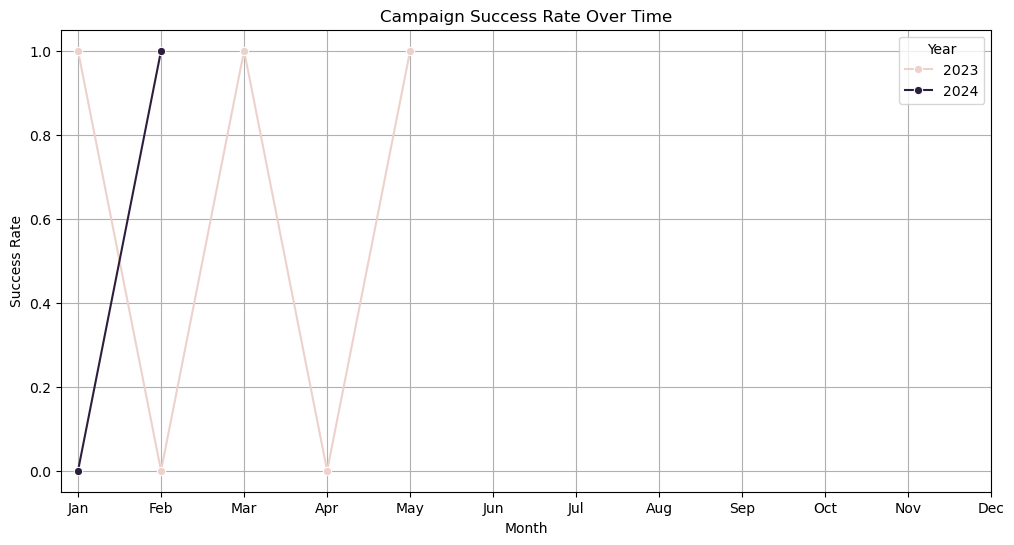

In [38]:
# Plotting the success rate over time

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_success, x='Month', y='Success_Rate', hue='Year', marker='o')
plt.title('Campaign Success Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [13]:
# Sample data with month names
data = {
    'month': ['January', 'February', 'March', 'April', 'May']
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a mapping from month names to month numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12
}

# Add a year column (assuming you want the year 2023 for this example)
df['year'] = 2023

# b. Analyze if specific months or days exhibit superior campaign performance.

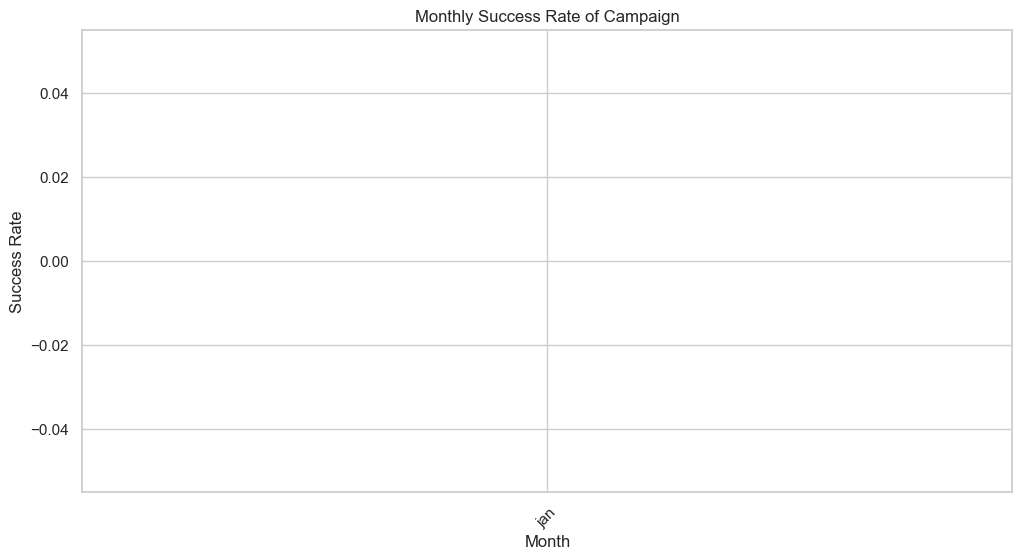

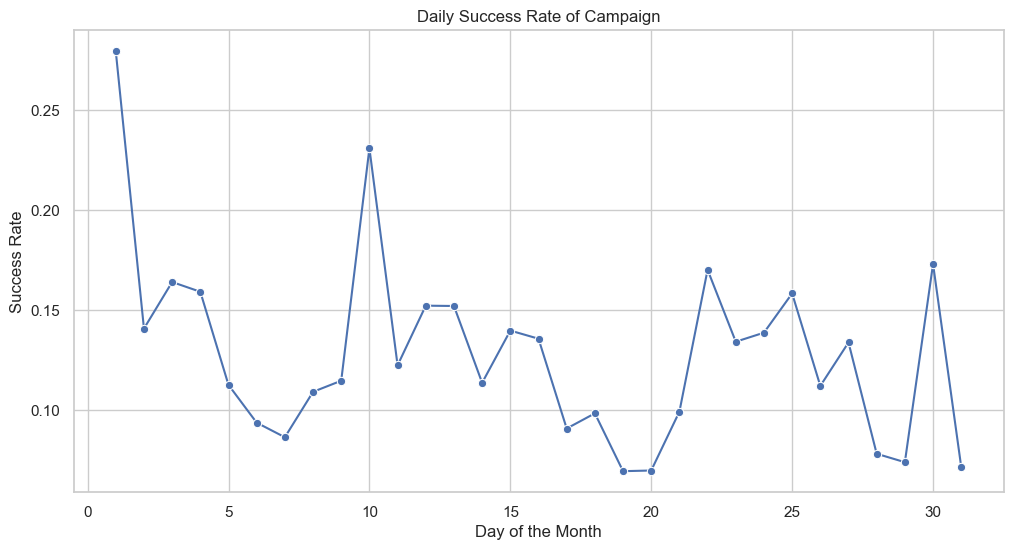

In [51]:
# Convert 'response' to binary if not already done
df['response_binary'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)

# Convert 'day' and 'month' to integers if they are not already
df['day'] = df['day'].astype(int)
df['month'] = pd.Categorical(df['month'], categories=[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun',
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
], ordered=True).codes + 1  # Convert months to numerical codes

# Analyze success by month
monthly_success = df.groupby('month')['response_binary'].mean().reset_index()
monthly_success['month'] = pd.Categorical.from_codes(monthly_success['month'] - 1, [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun',
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
])

# Plot success rate by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='response_binary', data=monthly_success, marker='o')
plt.title('Monthly Success Rate of Campaign')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze success by day of the month
daily_success = df.groupby('day')['response_binary'].mean().reset_index()

# Plot success rate by day of the month
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='response_binary', data=daily_success, marker='o')
plt.title('Daily Success Rate of Campaign')
plt.xlabel('Day of the Month')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

# 7. Feature Engineering
# a. Introduce new features that may enhance prediction, such as creating age groups or income categories.

In [72]:
# Define age bins and labels
bins_age = [0, 18, 30, 40, 50, 60, 100]  # Define age ranges
labels_age = ['18-29', '30-39', '40-49', '50-59', '60-69','70+']  # Labels for the bins

# Create a new column 'age_group' based on age bins
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

# Define income bins and labels
bins_salary = [0, 2000, 4000, 6000, 8000, 10000, 20000]  # Define salary ranges
labels_salary = ['<4000', '5000-24999', '25000-44999', '45000-64999', '65000-84999', '85000+']  # Labels for the bins

# Create a new column 'income_category' based on salary bins
df['income_category'] = pd.cut(df['salary'], bins=bins_salary, labels=labels_salary, right=False)

# Display the first few rows of the modified dataframe
print(df.head())

   customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  ... poutcome  response  duration_int sec_str  \
0      yes      no     yes   no  ...  unknown        no           261     sec   
1      yes      no     yes   no  ...  unknown        no           151     sec   
2      yes      no     yes  yes  ...  unknown        no            76     sec   
3       no      no     yes   no  ...  unknown        no            92     sec   
4       no      no      no   no  ...  unknown        no           198     sec   

   duration_minutes  response_binary           job  education age_group  \

In [79]:
# Define age bins and labels correctly
bins_age = [0, 18, 30, 40, 50, 60, 100]  # Define age ranges
labels_age = ['18-29', '30-39', '40-49', '50-59', '60-69','70+']  # Labels for the bins

# Create a new column 'age_group' based on age bins
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

# Replace zero values with NaN and then handle NaNs
df['salary'].replace(0, pd.NA, inplace=True)
df.dropna(subset=['salary'], inplace=True)

# Verify the age groups
print("Verification of Age Groups:")
print(df[['age', 'age_group']].head(10))  # Print first 10 rows to check age group assignment

# Group by age group and calculate the mean salary for each category
mean_salary_by_age = df.groupby("age_group")["salary"].mean().reset_index()

# Print the result
print("Mean Salary by Age Group:")
print(mean_salary_by_age)

Verification of Age Groups:
     age age_group
0   58.0     60-69
1   44.0     50-59
2   33.0     40-49
3   47.0     50-59
5   35.0     40-49
6   28.0     30-39
7   42.0     50-59
8   58.0     60-69
9   43.0     50-59
10  41.0     50-59
Mean Salary by Age Group:
  age_group        salary
0     18-29           NaN
1     30-39  48293.625119
2     40-49  59785.678629
3     50-59  57293.058681
4     60-69  58161.511614
5       70+  56531.890661


C:\Users\admin\AppData\Local\Temp\ipykernel_8528\3425207683.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].replace(0, pd.NA, inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_8528\3425207683.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_salary_by_age = df.groupby("age_group")["salary"].mean().reset_in

# b. Apply encoding techniques to transform categorical variables if necessary.

In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [87]:
label_encoder = LabelEncoder()
# Apply label encoding to 'job'
df['job_encoded'] = label_encoder.fit_transform(df['job'])
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=['marital', 'contact', 'poutcome', 'age_group', 'income_category'])
print(df_encoded)

# Combine the label-encoded and one-hot encoded columns
df_combined = pd.concat([df[['job_encoded']], df_encoded], axis=1)

# Display the first few rows of the combined dataframe
print(df_combined.head())

       customerid   age  salary  balance                  jobedu targeted  \
0               1  58.0  100000     2143     management,tertiary      yes   
1               2  44.0   60000       29    technician,secondary      yes   
2               3  33.0  120000        2  entrepreneur,secondary      yes   
3               4  47.0   20000     1506     blue-collar,unknown       no   
5               6  35.0  100000      231     management,tertiary      yes   
...           ...   ...     ...      ...                     ...      ...   
45206       45207  51.0   60000      825     technician,tertiary      yes   
45207       45208  71.0   55000     1729         retired,primary      yes   
45208       45209  72.0   55000     5715       retired,secondary      yes   
45209       45210  57.0   20000      668   blue-collar,secondary      yes   
45210       45211  37.0  120000     2971  entrepreneur,secondary      yes   

      default housing loan  day  ...  age_group_40-49 age_group_50-59  \
0 

# 8. Correlation Analysis
# a. Examine correlations between independent variables to identify multicollinearity.

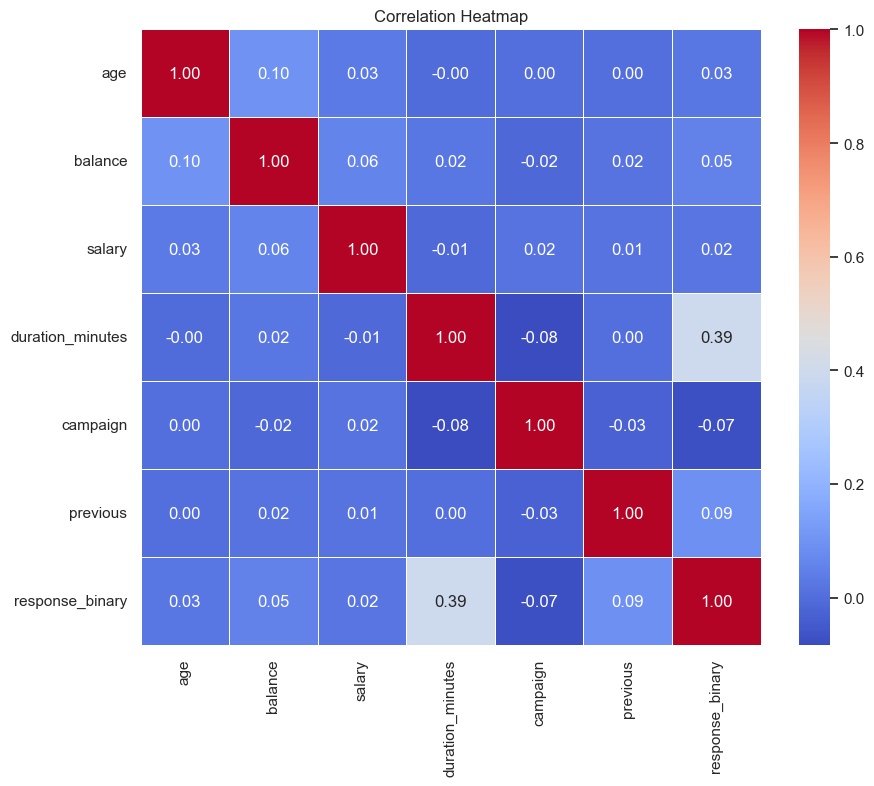

In [90]:
df['response_binary'] = df['response'].apply(lambda x: 1 if x == 'yes' else 0)
numeric_features = ['age', 'balance','salary', 'duration_minutes', 'campaign', 'previous']
df_numeric = df[numeric_features + ['response_binary']]

# Calculate correlations
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [35]:
# Prepare data for VIF calculation
X = df.copy()
X = add_constant(X)  # Add constant term for intercept

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     feature       VIF
0      const  2.052830
1    balance  3.763541
2  Balance_1  3.763541


# b. Evaluate how correlated features may influence the target variable.

In [105]:
df_new = df.select_dtypes(np.number)
df_new.head()

,customerid,age,balance,day,month,campaign,pdays,previous,duration_minutes,response_binary,job_encoded,response_numeric
0,1,58.0,2143,5,0,1,-1,0,4.350000,0,4,0
1,2,44.0,29,5,0,1,-1,0,2.516667,0,9,0
2,3,33.0,2,5,0,1,-1,0,1.266667,0,2,0
3,4,47.0,1506,5,0,1,-1,0,1.533333,0,1,0
5,6,35.0,231,5,0,1,-1,0,2.316667,0,4,0


In [106]:
df_new.corr()

,customerid,age,balance,day,month,campaign,pdays,previous,duration_minutes,response_binary,job_encoded,response_numeric
customerid,1.000000,0.014141,0.073599,-0.062298,NaN,-0.102598,0.437942,0.270890,0.012179,0.295629,0.064931,0.295629
age,0.014141,1.000000,0.097921,-0.007897,NaN,0.004422,-0.023327,0.001615,-0.004531,0.025324,-0.030556,0.025324
balance,0.073599,0.097921,1.000000,0.004849,NaN,-0.015042,0.003684,0.016936,0.021629,0.052870,0.016749,0.052870
day,-0.062298,-0.007897,0.004849,1.000000,NaN,0.161667,-0.093094,-0.051672,-0.030302,-0.028570,0.025102,-0.028570
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,-0.102598,0.004422,-0.015042,0.161667,NaN,1.000000,-0.088240,-0.032428,-0.084356,-0.072729,0.004627,-0.072729
pdays,0.437942,-0.023327,0.003684,-0.093094,NaN,-0.088240,1.000000,0.454357,-0.002597,0.102659,-0.022292,0.102659
previous,0.270890,0.001615,0.016936,-0.051672,NaN,-0.032428,0.454357,1.000000,0.000749,0.092695,0.000575,0.092695
duration_minutes,0.012179,-0.004531,0.021629,-0.030302,NaN,-0.084356,-0.002597,0.000749,1.000000,0.394605,0.005878,0.394605
response_binary,0.295629,0.025324,0.052870,-0.028570,NaN,-0.072729,0.102659,0.092695,0.394605,1.000000,0.041136,1.000000


In [107]:
df_new.var()

customerid          1.703792e+08
age                 1.124624e+02
balance             9.272582e+06
day                 6.922307e+01
month               0.000000e+00
campaign            9.565644e+00
pdays               1.005109e+04
previous            5.331836e+00
duration_minutes    1.844900e+01
response_binary     1.032623e-01
job_encoded         1.049274e+01
response_numeric    1.032623e-01
dtype: float64

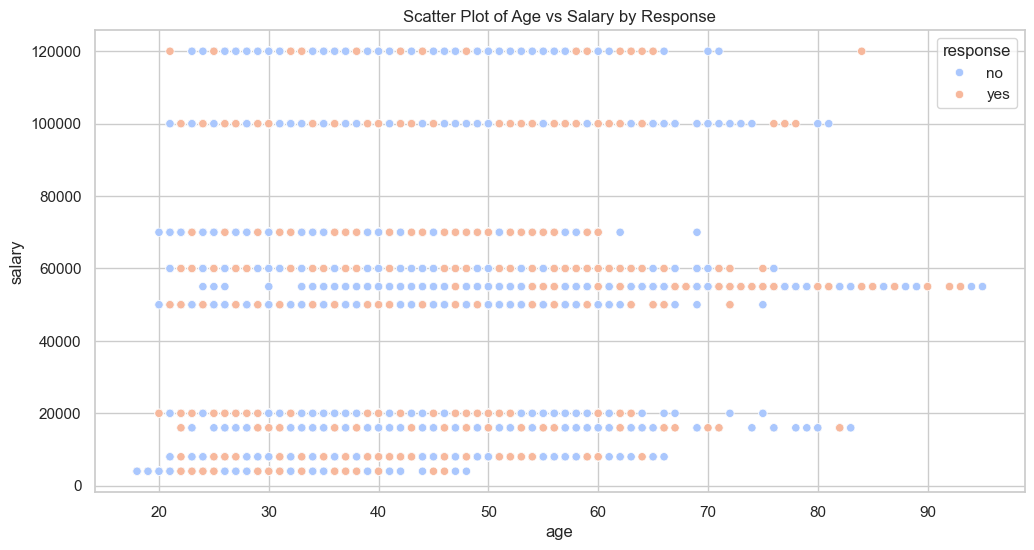

C:\Users\admin\AppData\Local\Temp\ipykernel_8528\3016788767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='salary', data=df, palette='coolwarm')


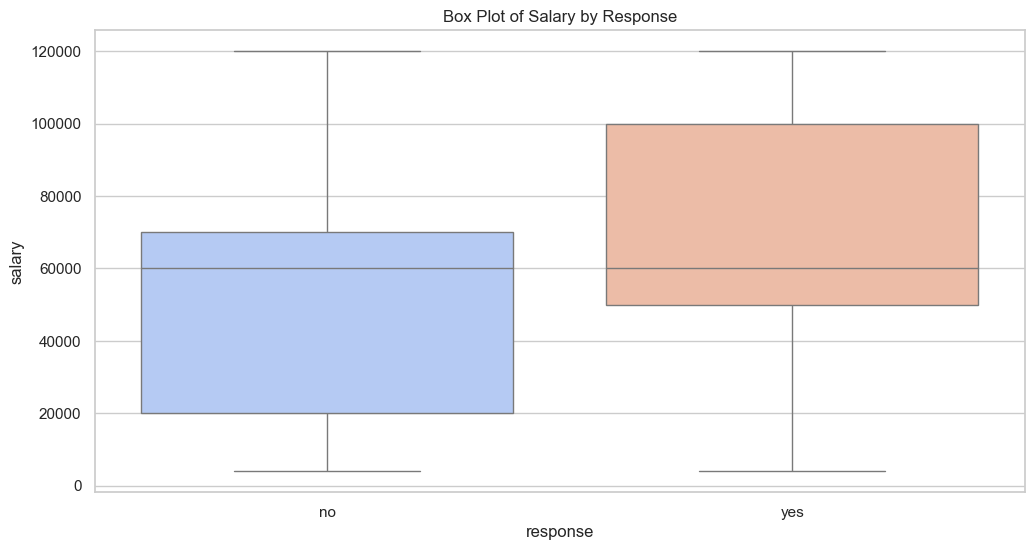

In [108]:
# Scatter plot for continuous features
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='salary', hue='response', data=df, palette='coolwarm')
plt.title('Scatter Plot of Age vs Salary by Response')
plt.show()

# Box plot for categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='response', y='salary', data=df, palette='coolwarm')
plt.title('Box Plot of Salary by Response')
plt.show()

# 9. Outlier Detection and Handling
# a. Identify and rectify outliers that could impact the analysis and predictions.

In [14]:
# Function to detect outliers using IQR

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect and display outliers for numerical columns

numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nNumber of outliers in column '{col}': {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.head())


Number of outliers in column 'customerid': 0

Number of outliers in column 'age': 487
       customerid   age  salary  balance   marital            jobedu targeted  \
29158       29159  83.0   55000      425   married   retired,primary      yes   
29261       29262  75.0   55000       46  divorced   retired,primary      yes   
29263       29264  75.0   55000     3324   married   retired,primary      yes   
29322       29323  83.0   55000     6236   married  retired,tertiary      yes   
29865       29866  75.0   55000     3881  divorced   retired,primary      yes   

      default housing loan    contact  day      month              duration  \
29158      no      no   no  telephone    2  feb, 2017              15.2 min   
29261      no      no   no   cellular    2  feb, 2017               4.9 min   
29263      no      no   no   cellular    2  feb, 2017  2.48333333333333 min   
29322      no      no   no   cellular    2  feb, 2017  4.71666666666667 min   
29865      no     yes   no   ce

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

Max value after capping: 120.0
Min value after capping: 22.0


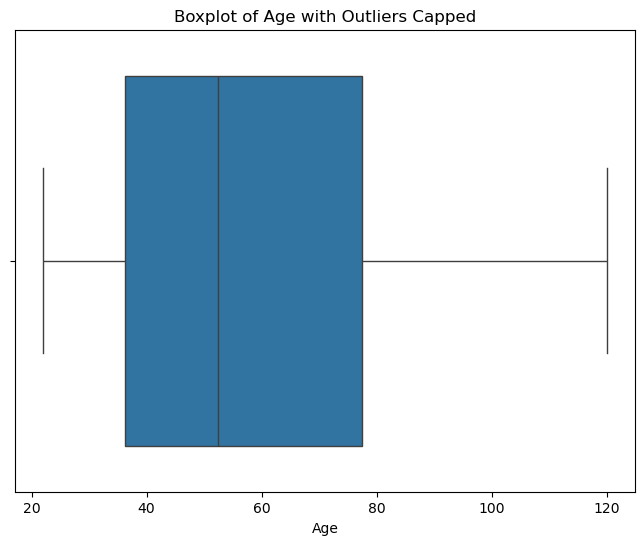

In [31]:
# Create a sample DataFrame
data = {
    'age': [22, 25, 30, 45, 50, 60, 100, 110, 120, 35, 40, 55, 70, 80]
}

df = pd.DataFrame(data)

# Calculate IQR for outlier detection
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handle outliers by capping
df['Age_1'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])
df['Age_1'] = np.where(df['Age_1'] < lower_bound, lower_bound, df['Age_1'])

# Print the new min and max values after capping
print("Max value after capping:", df['Age_1'].max())
print("Min value after capping:", df['Age_1'].min())

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age_1'])
plt.title('Boxplot of Age with Outliers Capped')
plt.xlabel('Age')
plt.show()

Max value after capping: 15187.5
Min value after capping: -1500.0


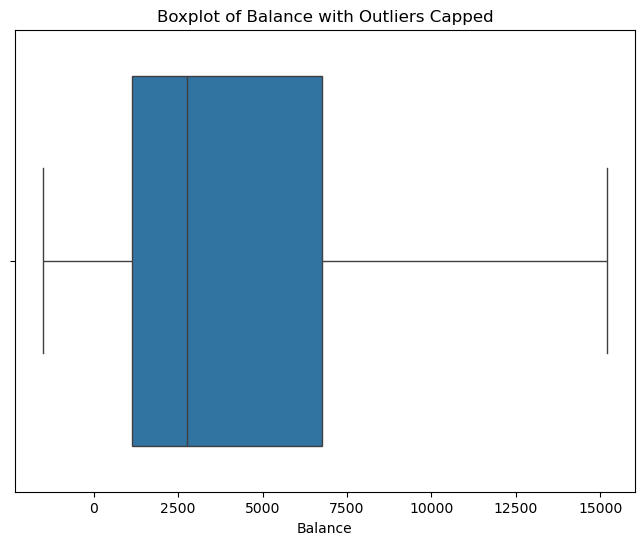

In [32]:
# Create a sample DataFrame
data = {
    'balance': [1000, 2000, -500, 3000, 1500, 2500, -1000, 4000, 50000, 6000, -1500, 7000, 8000, 9000]
}

df = pd.DataFrame(data)

# Calculate IQR for outlier detection
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handle outliers by capping
df['Balance_1'] = np.where(df['balance'] > upper_bound, upper_bound, df['balance'])
df['Balance_1'] = np.where(df['Balance_1'] < lower_bound, lower_bound, df['Balance_1'])

# Print the new min and max values after capping
print("Max value after capping:", df['Balance_1'].max())
print("Min value after capping:", df['Balance_1'].min())

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Balance_1'])
plt.title('Boxplot of Balance with Outliers Capped')
plt.xlabel('Balance')
plt.show()
